<a href="https://colab.research.google.com/github/VestikaWeerachandra/Second-hand-car-analysis/blob/main/Second_hand_car_reselling_price_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Second hand Cars re-selling Price Analysis**

In [ ]:
#connecting googledrive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np #numpy used for mathematical codes in python
import pandas as pd #pandas used to deal with datasets(clean, treat null values and analyse)
import matplotlib.pyplot as plt  #used for visualising data
import seaborn as sns #visualisng data
import statsmodels.api as sm  #used to explore data ,estimate statistical models and perform statistical tests
import os #importing python
sns.set() #setting theme in seaborn

from math import * #import all mathematical function
import warnings
warnings.filterwarnings("ignore")

**Loading the Raw Data**

In [ ]:
data= pd.read_csv("/content/drive/MyDrive/ML 02/Week 1/Second hand cars reselling price.csv")

In [ ]:
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [ ]:
data.tail()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla
4344,Volkswagen,13500.0,van,124,2.0,Diesel,yes,2013,T5 (Transporter)


In [ ]:
data.shape

(4345, 9)

### **Preprocessing**

In [ ]:
#getting statistical values for each column
data.describe(include= "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [ ]:
#finding the number of null values in each column
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

### **Determining the variables of Interest**

In [ ]:
# dropping it because there are different types of model for a given brand hence we can deal with a brand instead of the model for now
data1= data.drop(["Model"], axis=1)
data1

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014


In [ ]:
data1.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [ ]:
#removing null values from Price and Engine V column

data_no_mv= data1.dropna(axis=0)  #axis= 0 is because we remove rows, if we need to remove the column it should be axis=1


In [ ]:
data_no_mv

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985


In [ ]:
data_no_mv.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

### **Dealing with Outliers**

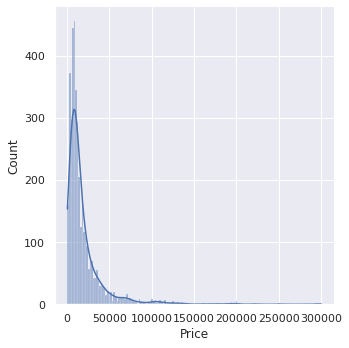

In [ ]:
sns.displot(data_no_mv["Price"], kde =True ) #plotting to see the outliers
plt.show()

In [ ]:
q=data_no_mv["Price"].quantile(0.99) #using quantile method to remove the outliers
data_1= data_no_mv[data_no_mv["Price"]< q] 
data_1.describe()

,Price,Mileage,EngineV,Year
count,3984.000000,3984.000000,3984.000000,3984.000000
mean,17837.117460,165.116466,2.743770,2006.292922
std,18976.268315,102.766126,4.956057,6.672745
min,600.000000,0.000000,0.600000,1969.000000
25%,6980.000000,93.000000,1.800000,2002.750000
50%,11400.000000,160.000000,2.200000,2007.000000
75%,21000.000000,230.000000,3.000000,2011.000000
max,129222.000000,980.000000,99.990000,2016.000000


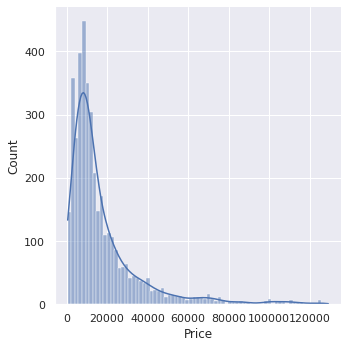

In [ ]:
sns.displot(data_1["Price"], kde =True) #plotting to see the outliers
plt.show()

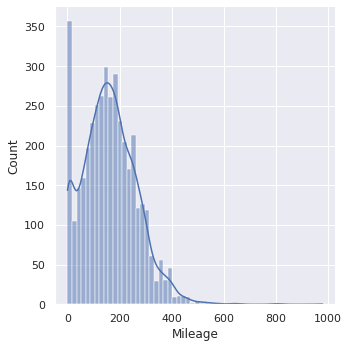

In [ ]:
#dealing with mileage column

sns.displot(data_no_mv["Mileage"], kde =True) #plotting to see the outliers
plt.show()

In [ ]:
q1=data_no_mv["Mileage"].quantile(0.99) #using quantile method to remove the outliers
data_2= data_1[data_1["Mileage"]< q1] #
data_2.describe()


,Price,Mileage,EngineV,Year
count,3943.000000,3943.000000,3943.000000,3943.000000
mean,17936.780614,161.414659,2.747497,2006.393102
std,19009.750360,95.940408,4.981033,6.593870
min,600.000000,0.000000,0.600000,1969.000000
25%,7000.000000,92.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21417.500000,230.000000,3.000000,2011.000000
max,129222.000000,433.000000,99.990000,2016.000000


In [ ]:
data_2

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985


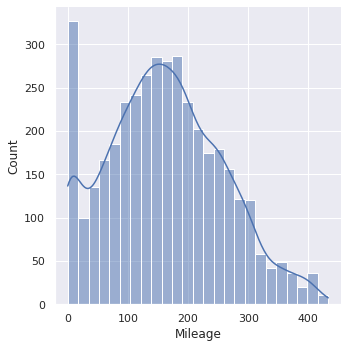

In [ ]:
sns.displot(data_2["Mileage"], kde =True) #plotting to see the outliers
plt.show()

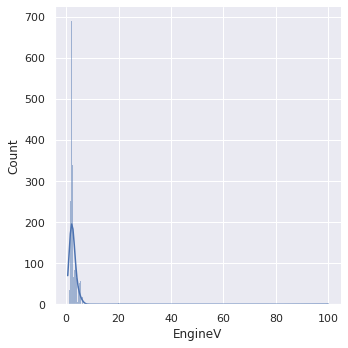

In [ ]:
#dealing with EngineV column

sns.displot(data_no_mv["EngineV"], kde =True) #plotting to see the outliers
plt.show()

The engine cap range would be 0.5-6.5 but since some of the values dont match we remove the values more than 6.5

In [ ]:
data_3 =data_2[data_2['EngineV'] < 6.5]
data_3

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985


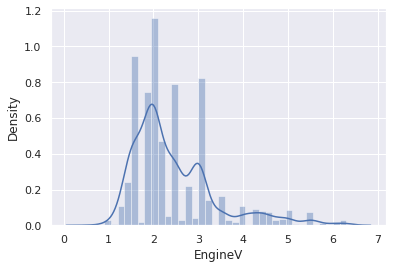

In [ ]:
sns.distplot(data_3["EngineV"]) #plotting to see the outliers
plt.show()

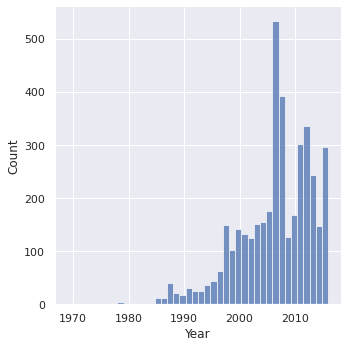

In [ ]:
sns.displot(data_no_mv["Year"])
plt.show()

In [ ]:
q4=data_3["Year"].quantile(0.01) #since this is left skewed we remove first 1% if data to remove outliers
data_4=data_3[data_3["Year" ]> q4] #
data_4.describe()

,Price,Mileage,EngineV,Year
count,3866.000000,3866.000000,3866.000000,3866.000000
mean,18197.480629,160.471547,2.450246,2006.713140
std,19087.396949,95.543697,0.949413,6.101235
min,800.000000,0.000000,0.600000,1988.000000
25%,7200.000000,91.000000,1.800000,2003.000000
50%,11700.000000,157.000000,2.200000,2008.000000
75%,21700.000000,225.000000,3.000000,2012.000000
max,129222.000000,433.000000,6.300000,2016.000000


In [ ]:
data_4


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


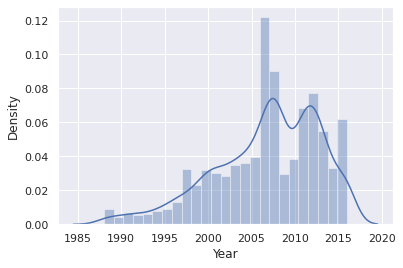

In [ ]:
sns.distplot(data_4["Year"])
plt.show()

In [ ]:
data_cleaned= data_4.reset_index(drop=True) #current index will be deleted. This is to remove the index that comes automatically from the dataset

data_cleaned


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
3861,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
3862,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
3863,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
3864,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


In [ ]:
data_cleaned.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3866,3866.000000,3866,3866.000000,3866.000000,3866,3866,3866.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1466,NaN,NaN,1807,3504,NaN
mean,NaN,18197.480629,NaN,160.471547,2.450246,NaN,NaN,2006.713140
std,NaN,19087.396949,NaN,95.543697,0.949413,NaN,NaN,6.101235
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


### **Checking the OLS (Ordinary Least Square) assumptions**

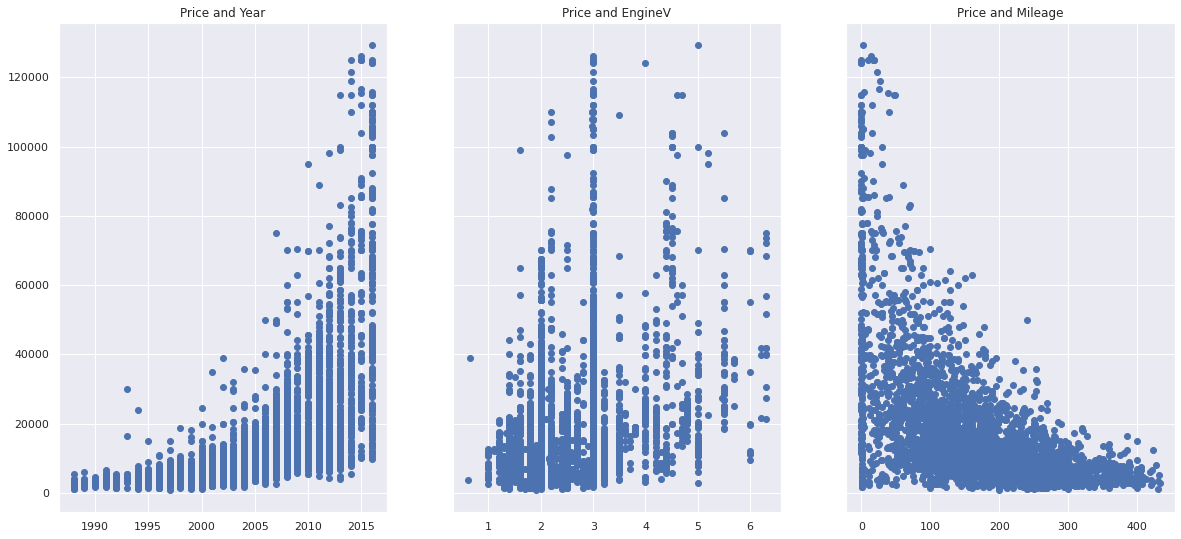

In [ ]:
#plotting independant variables against all the dependant variable (Price)

f, (ax1, ax2, ax3)= plt.subplots(1,3,sharey=True, figsize = (20,9))


ax1.scatter(data_cleaned ["Year"], data_cleaned['Price'])
ax1.set_title("Price and Year")

ax2.scatter(data_cleaned ["EngineV"], data_cleaned['Price'])
ax2.set_title("Price and EngineV")

ax3.scatter(data_cleaned ["Mileage"], data_cleaned['Price'])
ax3.set_title("Price and Mileage")

plt.show()

### Log Tranformation

In [ ]:
#normalising the skewed data

log_price= np.log(data_cleaned['Price']) #Log transformation is done for DEPENDANT Variable
data_cleaned['log_price']= log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3861,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3862,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3863,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3864,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


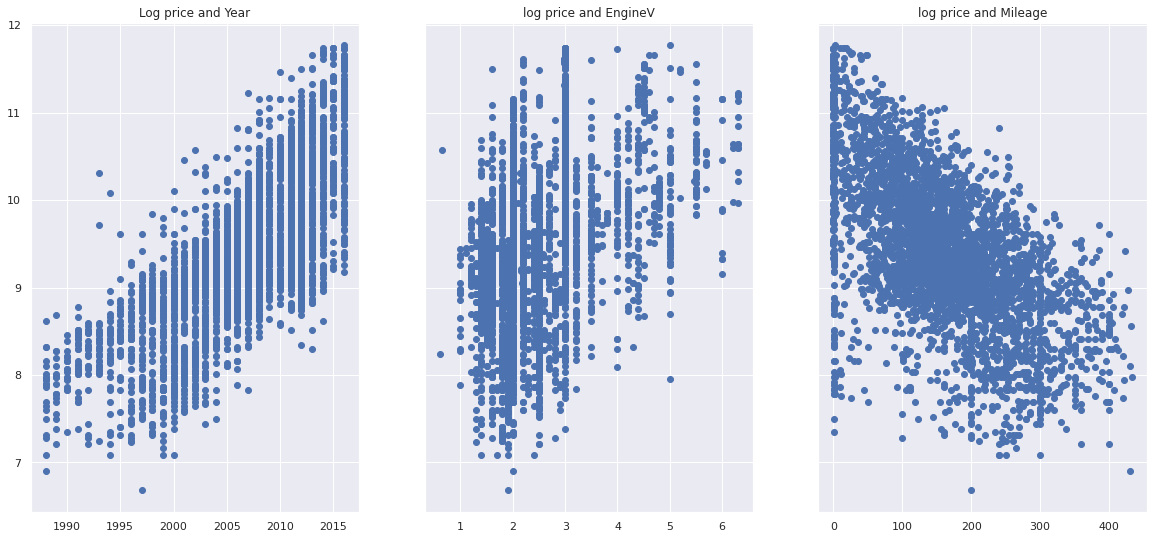

In [ ]:
#plotting all independant variables against all the dependant variable (Price)

f, (ax1, ax2, ax3)= plt.subplots(1,3,sharey=True, figsize = (20,9))


ax1.scatter(data_cleaned ["Year"], data_cleaned['log_price'])
ax1.set_title("Log price and Year")

ax2.scatter(data_cleaned ["EngineV"], data_cleaned['log_price'])
ax2.set_title("log price and EngineV")

ax3.scatter(data_cleaned ["Mileage"], data_cleaned['log_price'])
ax3.set_title("log price and Mileage")

plt.show()

In [ ]:
data_cleaned= data_cleaned.drop(['Price'], axis=1) #removing price from the dataset

### **Removing Multi collinearity**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_cleaned [['Mileage','Year','EngineV']]
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"]= variables.columns

vif

,VIF,features
0,3.794319,Mileage
1,10.360888,Year
2,7.660317,EngineV


From the VIF data frame we can see that year has the high collieanrity, therefore, we drop the Year column

In [ ]:
data_no_mc= data_cleaned.drop(['Year'], axis=1) 
data_no_mc.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656


### **Creating Dummies**

In [ ]:
# changing the data to numerical since most of them are categorical, this is done for analysis purpose

data_with_dummies=pd.get_dummies(data_no_mc, drop_first= True)
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [ ]:
data_with_dummies.columns

Index(['Mileage', 'EngineV', 'log_price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

In [ ]:
cols= ['log_price','Mileage','EngineV','Brand_BMW','Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes']

In [ ]:
data_preprocessed=data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### **Downloading the preprocessed data**

In [ ]:
data_preprocessed.to_csv('data_preprocessed.csv')
data_preprocessed= pd.read_csv('data_preprocessed.csv')

### **Linear Regression Model**

In [ ]:
targets= data_preprocessed['log_price']
inputs= data_preprocessed.drop(['log_price'],axis=1)

### **Scaling the data**

In [ ]:
import sklearn as sk
from sklearn.preprocessing import StandardScaler

In [ ]:
scalar= StandardScaler()
scalar.fit(inputs)

StandardScaler()

In [ ]:
inputs_scaled= scalar.transform(inputs)

### **Test Train split**

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(inputs_scaled,targets,test_size=0.25, random_state= 365)

In [ ]:
x_train

array([[-1.34406430e-03,  1.41612724e-01, -2.63613631e-01, ...,
        -1.62113726e-01, -7.50101044e-01,  3.21419511e-01],
       [ 1.50131983e+00,  2.56758184e-01, -2.63613631e-01, ...,
        -1.62113726e-01, -7.50101044e-01,  3.21419511e-01],
       [ 6.98465416e-01,  1.93160124e+00, -5.79639358e-01, ...,
        -1.62113726e-01, -7.50101044e-01, -3.11119881e+00],
       ...,
       [-1.01387251e+00,  6.44065640e-01,  3.21266937e+00, ...,
        -1.62113726e-01,  1.33315372e+00,  3.21419511e-01],
       [ 7.23554617e-01, -1.29247164e+00,  5.79121641e-01, ...,
        -1.62113726e-01, -7.50101044e-01,  3.21419511e-01],
       [ 1.55329031e+00,  8.53421022e-01, -2.63613631e-01, ...,
        -1.62113726e-01, -7.50101044e-01,  3.21419511e-01]])

In [ ]:
y_train

1931     9.341369
3608     9.464983
2712     8.318742
1229     9.449357
1734    10.273325
          ...    
428     11.074421
859     10.434116
801      9.928180
2740    10.609057
3666     8.824678
Name: log_price, Length: 2899, dtype: float64

### **Creating Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
yhat= reg.predict(x_train)

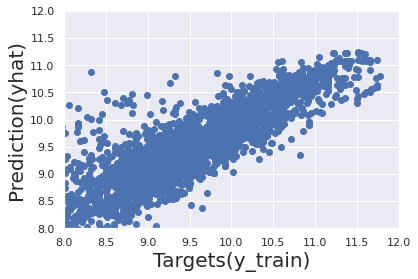

In [ ]:
plt.scatter(y_train,yhat)
plt.xlabel('Targets(y_train)',fontsize= 20)
plt.ylabel('Prediction(yhat)',fontsize= 20)
plt.xlim(8,12)
plt.ylim(8,12)
plt.show()

#This is optimised model since the curve of the graph in on the linear regression

In [ ]:
y_train-yhat

1931   -0.312566
3608   -0.134525
2712    0.871886
1229    0.246138
1734    0.015801
          ...   
428     0.216538
859     0.134830
801     0.041171
2740   -0.073963
3666   -0.506304
Name: log_price, Length: 2899, dtype: float64

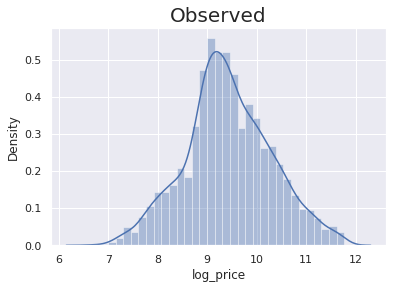

In [ ]:
sns.distplot(y_train)
plt.title("Observed", size= 20)
plt.show()

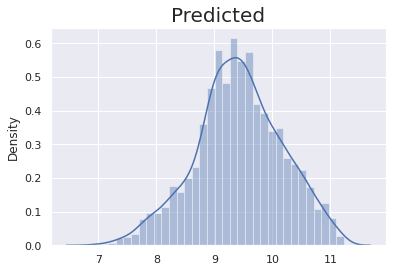

In [ ]:
sns.distplot(yhat)
plt.title("Predicted", size= 20)
plt.show()

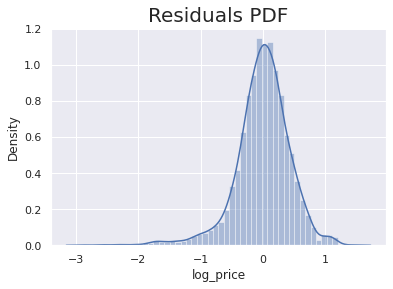

In [ ]:
sns.distplot(y_train-yhat)
plt.title("Residuals PDF", size= 20)
plt.show()